# Project 2: Is it classification or regression?
## Predicting wine quality from its physiochemical characteristics

Is there such a thing as a good wine and a bad wine?
Many people think that, excluding particularly bad vinegar-like wines, there isn't much difference between your 15€ and your 60€ bottle.

# Objective
To interpret the dataset and choose a model which is, either a classification one (discrete) or as a regression one (continuous).

# Conclusion


<font color='green'> **Binary Classification problem with tuned Random forests**</font> being the best model having **accuracy of 0.8797 (red wine), 0.8316 (white wine)** with **least errors 0.1202 (red wine), 0.1683 (white wine)**. <font color='red'>Regression</font> on the other hand along with feature engineering did <font color='red'>not</font> prove to be a very <font color='red'>suitable</font> model. The scores of all the models we tried in Regression are as follows:



<h3><center>Red Wine</center></h3>

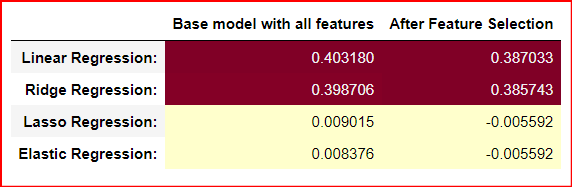

<h3><center>White wine</center></h3>

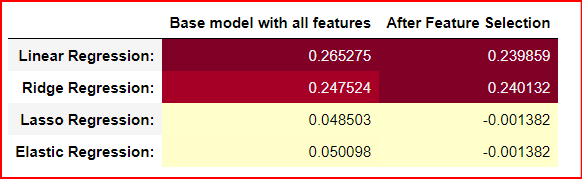

<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS">📖 Import Libraries</h2>

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import collections
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import warnings
import scipy.stats as stats
from scipy.stats import norm
warnings.filterwarnings('ignore')

<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS">Load and Check Data</h2>

In [2]:
rw = pd.read_csv('winequality-red.csv', sep=';')
ww = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
print("Data Info")
rw.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
print("Data Info")
ww.info()

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Every entry in the dataset is numeric data, the data in white wine is more than double the red wine.

In [5]:
rw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
ww.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Check if missing values exist in the dataset


In [7]:
rw.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
ww.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<ul>
    <li style = "color:darkred;font-family:Segoe Print" > <p style = "color:black;font-family:Comic Sans MS" >we see that there is no missing Values in the data. We are good to go to Visualization.</p> </li>
</ul>

<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Visualization</h2>

<ul>
    <li style = "color:red;font-family:Segoe Print" > <p style = "color:black;font-family:Comic Sans MS" >Distribution of individual features of both datasets</p> </li>
</ul>

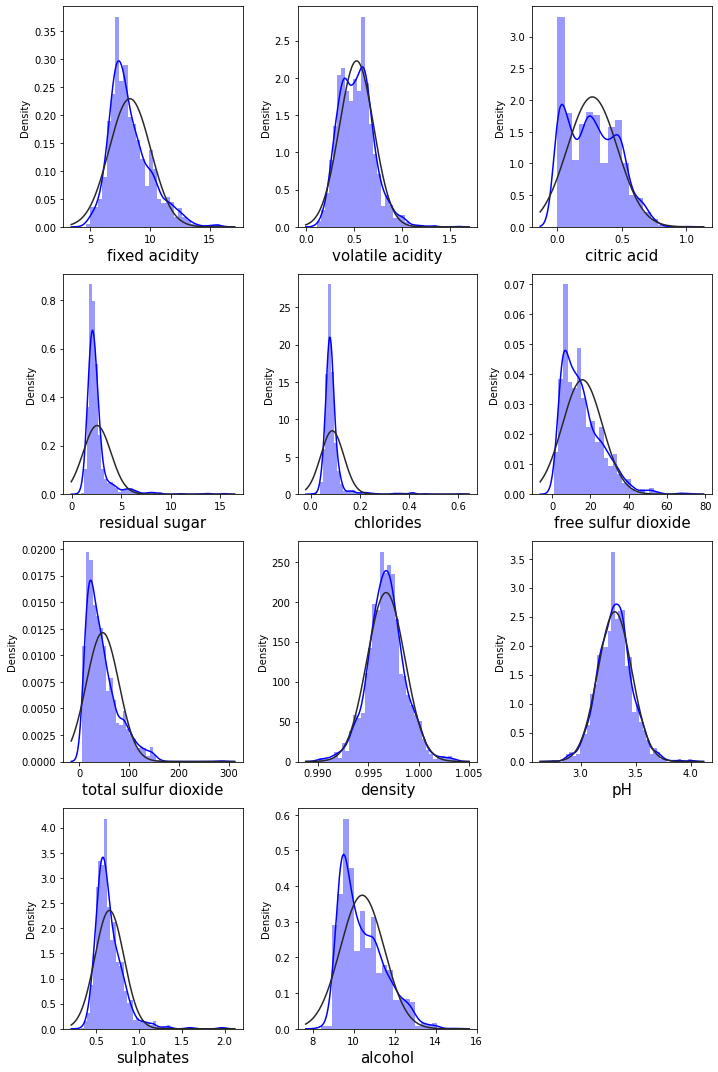

In [9]:
plt.figure(figsize = (10, 15))
plotnumber = 1

for col in rw:
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(rw[col],  fit=norm, color="blue")
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

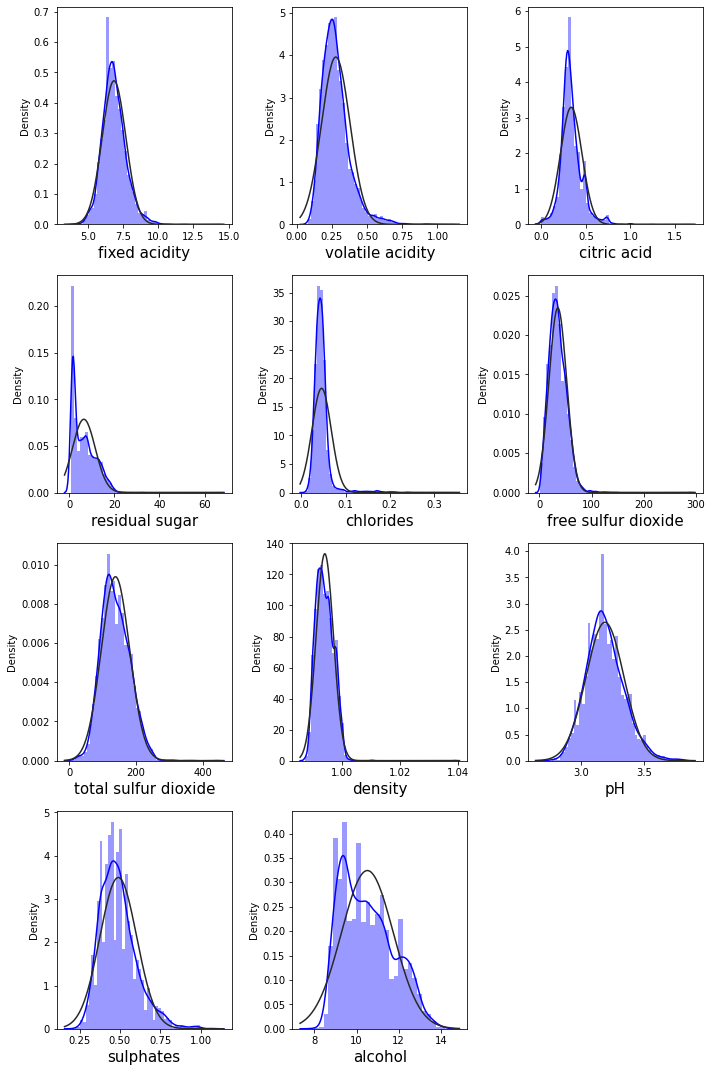

In [10]:
plt.figure(figsize = (10, 15))
plotnumber = 1

for col in ww:
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.distplot(ww[col],  fit=norm, color="blue")
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the Individual Feature distribution of both the datasets Red and white wine. We can deduce that some of the features are more or less skewed and there could be probability of outliers which should 
be taken care after selecting the base model.

<a id ='3' ></a>
<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Basic Data Analysis</h2>

<p style = "color:darkred;font-family:Comic Sans MS;font-weight:bold" >In this section, we will look at how properties have an effect on the target variable.</p> 

<ul>
    <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > fixed acidity - <strong>  quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > volatile acidity -<strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > citric acid - <strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > residual sugar - <strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > chlorides - <strong>  quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > free sulfur dioxide -<strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > total sulfur dioxide - <strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > density - <strong> quality </strong> </p> </li>  
            <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > pH - <strong>  quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > sulphates -<strong> quality </strong> </p> </li>
        <li style = "color:darkgreen"> <p style = "color:black;font-family:Comic Sans MS" > alcohol - <strong> quality </strong> </p> </li>
</ul>

### Redwine & Whitewine

<a id ='4' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">fixed acidity - quality  </h4>

In [11]:
print('Red wine')
display(rw[["fixed acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["fixed acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,fixed acidity
0,3,8.360000
1,4,7.779245
2,5,8.167254
3,6,8.347179
4,7,8.872362
5,8,8.566667


-------------
White wine


,quality,fixed acidity
0,3,7.600000
1,4,7.129448
2,5,6.933974
3,6,6.837671
4,7,6.734716
5,8,6.657143
6,9,7.420000


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in fixed acidity <b>positively</b> effects quality of <b>red wine</b>.but it is difficult to make a full conclusion at this stage. </p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in fixed acidity <b>negatively</b> effects quality of <b>white wine</b>.but it is difficult to make a full conclusion at this stage. </p> </li>
</ul>

<a id ='5' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">volatile acidity - quality </h4>

In [12]:
print('Red wine')
display(rw[["volatile acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["volatile acidity","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,volatile acidity
0,3,0.884500
1,4,0.693962
2,5,0.577041
3,6,0.497484
4,7,0.403920
5,8,0.423333


-------------
White wine


,quality,volatile acidity
0,3,0.333250
1,4,0.381227
2,5,0.302011
3,6,0.260564
4,7,0.262767
5,8,0.277400
6,9,0.298000


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in volatile acidity <b>negatively</b> affects quality of <b>red wine.</b></p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in volatile acidity <b>negatively</b> effects quality of <b>white wine</b>. But it is hard to derive conclusions at the point of time.</p> </li>
</ul>

<a id ='6' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">citric acid - quality </h4>

In [13]:
print('Red wine')
display(rw[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["citric acid","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


-------------
White wine


,quality,citric acid
0,3,0.336000
1,4,0.304233
2,5,0.337653
3,6,0.338025
4,7,0.325625
5,8,0.326514
6,9,0.386000


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in citric acid <b>positively</b> effects quality of <b>red wine</b>.</p> </li>
</ul>
<ul>
 <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in citric acid affects quality of <b>white wine</b>.</p> </li>
</ul>

<a id ='7' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">residual sugar - quality </h4>

In [14]:
print('Red wine')
display(rw[["residual sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["residual sugar","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,residual sugar
0,3,2.635000
1,4,2.694340
2,5,2.528855
3,6,2.477194
4,7,2.720603
5,8,2.577778


-------------
White wine


,quality,residual sugar
0,3,6.392500
1,4,4.628221
2,5,7.334969
3,6,6.441606
4,7,5.186477
5,8,5.671429
6,9,4.120000


<ul>
<li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in residual sugar affects quality of <b>red wine</b>.</p> </li>
</ul>
<ul>
 <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in residual sugar affects quality of <b>white wine</b>.</p> </li>
</ul>

<a id ='8' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">chlorides - quality </h4>

In [15]:
print('Red wine')
display(rw[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["chlorides","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


-------------
White wine


,quality,chlorides
0,3,0.054300
1,4,0.050098
2,5,0.051546
3,6,0.045217
4,7,0.038191
5,8,0.038314
6,9,0.027400


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in chlorides <b>negatively</b> affects quality of <b>red wine.</b></p> </li>
</ul>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in chlorides <b>negatively</b> affects quality of <b>white wine.</b></p> </li>
</ul>


<a id ='9' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">free sulfur dioxide - quality </h4>

In [16]:
print('Red wine')
display(rw[["free sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["free sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,free sulfur dioxide
0,3,11.000000
1,4,12.264151
2,5,16.983847
3,6,15.711599
4,7,14.045226
5,8,13.277778


-------------
White wine


,quality,free sulfur dioxide
0,3,53.325000
1,4,23.358896
2,5,36.432052
3,6,35.650591
4,7,34.125568
5,8,36.720000
6,9,33.400000


<ul>
<li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in free sulfur dioxide affects quality of <b>red wine</b>.</p> </li>
</ul>
<ul>
 <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in free sulfur dioxide affects quality of <b>white wine</b>.</p> </li>
</ul>

<a id ='10' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">total sulfur dioxide - quality </h4>

In [17]:
print('Red wine')
display(rw[["total sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["total sulfur dioxide","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,total sulfur dioxide
0,3,24.900000
1,4,36.245283
2,5,56.513950
3,6,40.869906
4,7,35.020101
5,8,33.444444


-------------
White wine


,quality,total sulfur dioxide
0,3,170.600000
1,4,125.279141
2,5,150.904598
3,6,137.047316
4,7,125.114773
5,8,126.165714
6,9,116.000000


<ul>
<li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >There is <b>no pattern</b> in total sulfur dioxide affects quality of <b>red wine</b>.</p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in total sulfur dioxide <b>negatively</b> affects quality of <b>white wine.</b></p> </li>
</ul>

<a id ='11' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">density - quality </h4>

In [18]:
print('Red wine')
display(rw[["density","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["density","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


-------------
White wine


,quality,density
0,3,0.994884
1,4,0.994277
2,5,0.995263
3,6,0.993961
4,7,0.992452
5,8,0.992236
6,9,0.991460


<ul>
<li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >Density remains more or less <b>same</b> for all quality groups in <b>red and white wine</b>.</p> </li>
</ul>

<a id ='12' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">pH - quality </h4>

In [19]:
print('Red wine')
display(rw[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["pH","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


-------------
White wine


,quality,pH
0,3,3.187500
1,4,3.182883
2,5,3.168833
3,6,3.188599
4,7,3.213898
5,8,3.218686
6,9,3.308000


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in pH <b>negatively</b> affects quality of <b>red wine.</b></p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in pH <b>positively</b> affects quality of <b>white wine</b>. But it is difficult to conclude at this point of time.</p> </li>
</ul>

<a id ='13' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">sulphates - quality</h4>

In [20]:
print('Red wine')
display(rw[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["sulphates","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,sulphates
0,3,0.570000
1,4,0.596415
2,5,0.620969
3,6,0.675329
4,7,0.741256
5,8,0.767778


-------------
White wine


,quality,sulphates
0,3,0.474500
1,4,0.476135
2,5,0.482203
3,6,0.491106
4,7,0.503102
5,8,0.486229
6,9,0.466000


<ul>
 <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in sulphates <b>positively</b> affects quality of <b>red wine</b>.</p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in sulphates <b>positively</b> affects quality of <b>white wine</b>. But it is difficult to conclude at this point of time.</p> </li>
</ul>


<a id ='14' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">alcohol - quality</h4>

In [21]:
print('Red wine')
display(rw[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))
print('-------------')
print('White wine')
display(ww[["alcohol","quality"]].groupby(["quality"], as_index = False).mean().sort_values(by = "quality").style.background_gradient("Reds"))

Red wine


,quality,alcohol
0,3,9.955000
1,4,10.265094
2,5,9.899706
3,6,10.629519
4,7,11.465913
5,8,12.094444


-------------
White wine


,quality,alcohol
0,3,10.345000
1,4,10.152454
2,5,9.808840
3,6,10.575372
4,7,11.367936
5,8,11.636000
6,9,12.180000


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can say that the increase in alcohol <b>positively</b> affects quality of <b>red & white wine</b>. But it is difficult to conclude at this point of time.</p> </li>
</ul>

# Linear Regression

#### What we will use:
1. Linear
2. Ridge
3. Lasso
4. Elastic Net

In [22]:
def score_linearRegression(X_train, X_test, y_train, y_test):
    linearRegression = linear_model.LinearRegression();
    linearRegression.fit(X_train, y_train)
    return linearRegression.score(X_test, y_test)

def score_ridgeRegression(X_train, X_test, y_train, y_test):
    ridgeRegression = linear_model.Ridge(alpha=1)
    ridgeRegression.fit(X_train, y_train)
    return ridgeRegression.score(X_test, y_test)

    
def score_lassoRegression(X_train, X_test, y_train, y_test):
    lassoRegression = linear_model.Lasso(alpha=1)
    lassoRegression.fit(X_train, y_train)
    return lassoRegression.score(X_test, y_test)

def score_elasticRegression(X_train, X_test, y_train, y_test):
    elasticRegression = linear_model.ElasticNet(alpha=1)
    elasticRegression.fit(X_train, y_train)
    return elasticRegression.score(X_test, y_test)

In [23]:
def result_basemodel(X_train, X_test, y_train, y_test):
    name = ["Linear Regression: ", "Ridge Regression: ",  "Lasso Regression: ", "Elastic Regression: "]
    return pd.DataFrame([score_linearRegression(X_train, X_test, y_train, y_test),
                        score_ridgeRegression(X_train, X_test, y_train, y_test),
                        score_lassoRegression(X_train, X_test, y_train, y_test),
                        score_elasticRegression(X_train, X_test, y_train, y_test)], index = name, columns= ['Base model with all features'])  

##### Red wine

In [24]:
# split the input and label
X_red = rw.loc[:, rw.columns != "quality"]
y_red = rw["quality"]

In [25]:
# train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)


In [26]:
df_lred_before = result_basemodel(X_red_train, X_red_test, y_red_train, y_red_test)
df_lred_before.style.background_gradient('YlOrRd')

,Base model with all features
Linear Regression:,0.403180
Ridge Regression:,0.398706
Lasso Regression:,0.009015
Elastic Regression:,0.008376


### Feature Selection using Pearson's Correlation to narrow down insights from basic visualization.

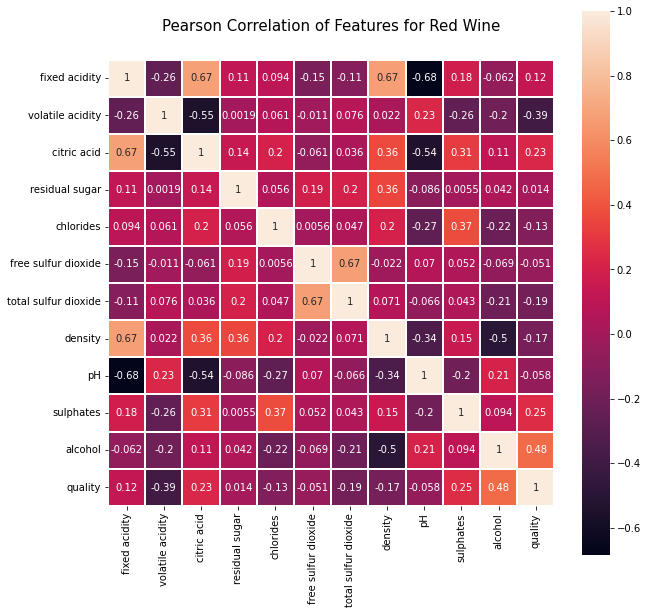

In [27]:
# Pearson's Correlation Matrix using colormap

colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features for Red Wine', y=1.05, size=15)
sns.heatmap(rw.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True,  linecolor='white', annot=True)
plt.show()

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >['alcohol', 'volatile acidity' ,'sulphates'] are the features with most correlation from the above pearson chart</p> </li>
</ul>

##### White wine

In [28]:
# split the input and label
X_white = ww.loc[:, ww.columns != "quality"]
y_white = ww["quality"]

In [29]:
# train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

In [30]:
print("white wine result: ")
df_lwhite_before = result_basemodel(X_white_train, X_white_test, y_white_train, y_white_test)
df_lwhite_before.style.background_gradient('YlOrRd')

white wine result: 


,Base model with all features
Linear Regression:,0.265275
Ridge Regression:,0.247524
Lasso Regression:,0.048503
Elastic Regression:,0.050098


### Feature Selection using Pearson's Correlation to narrow down insights from basic visualization.

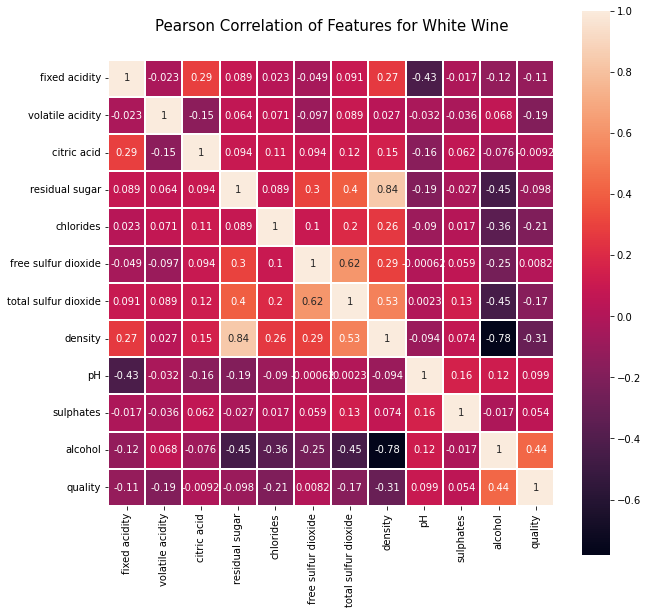

In [31]:
# Pearson's Correlation Matrix using colormap
 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features for White Wine', y=1.05, size=15)
sns.heatmap(ww.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)
plt.show()

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >['alcohol', 'density', 'chlorides', 'volatile acidity'] are the features with most correlation from the above pearson chart</p> </li>
</ul>

#### Feature selection using Lasso regression

In [32]:
def lasso_selection(X_train, y_train):
    pipeline = Pipeline([
                         ('scaler',StandardScaler()),
                         ('model',Lasso())])

    search = GridSearchCV(pipeline,
                          {'model__alpha':np.arange(0.1,10,0.1)},
                          cv = 5, scoring="neg_mean_squared_error")

    return search.fit(X_train, y_train)

##### Red wine

In [33]:
search = lasso_selection(X_red_train, y_red_train)

In [34]:
search.best_params_

{'model__alpha': 0.1}

In [35]:
coefficients = np.abs(search.best_estimator_.named_steps['model'].coef_)

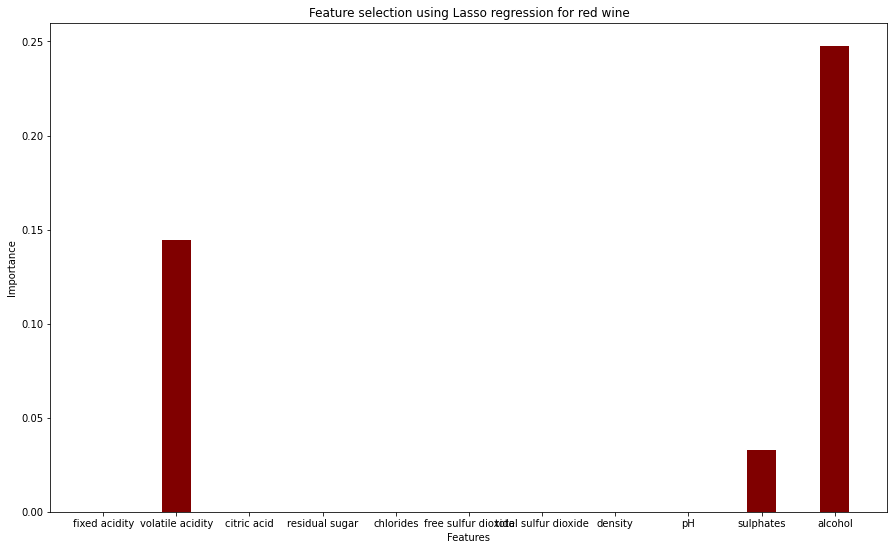

In [36]:
fig = plt.figure(figsize = (15, 9))
 
# creating the bar plot
plt.bar(X_red.columns,coefficients,  color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature selection using Lasso regression for red wine")
plt.show()

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >['alcohol', 'volatile acidity' ,'sulphates'] are features of significance.</p> </li>
</ul>

##### White wine

In [37]:
search = lasso_selection(X_white_train, y_white_train)

In [38]:
search.best_params_

{'model__alpha': 0.1}

In [39]:
coefficients = np.abs(search.best_estimator_.named_steps['model'].coef_)

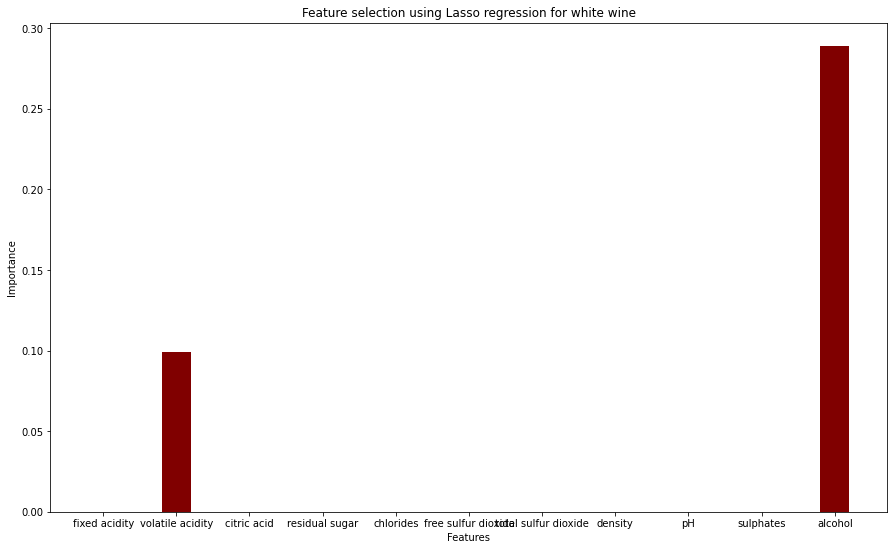

In [40]:
fig = plt.figure(figsize = (15, 9))
 
# creating the bar plot
plt.bar(X_white.columns,coefficients,  color ='maroon',
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature selection using Lasso regression for white wine")
plt.show()

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >['alcohol', 'volatile acidity'] are features of significance.</p> </li>
</ul>

##### Red wine
--------
pearson's correlation:
	
	alcohol, volatile acidity, sulphates

Lasso: 

	alcohol, volatile acidity, sulphates


Will Use:
1. alcohol 
2. volatile acidity 
3. sulphates


##### White wine 
----------
pearson's correlation:
	
	alcohol, density, chlorides, volatile acidity 

Lasso: 

	alcohol, volatile acidity


Will Use:
1. alcohol 
2. volatile acidity 

# Linear Regression with feature selection

In [41]:
def result_basemodel_after(X_train, X_test, y_train, y_test):
    name = ["Linear Regression: ", "Ridge Regression: ",  "Lasso Regression: ", "Elastic Regression: "]
    return pd.DataFrame([score_linearRegression(X_train, X_test, y_train, y_test),
                        score_ridgeRegression(X_train, X_test, y_train, y_test),
                        score_lassoRegression(X_train, X_test, y_train, y_test),
                        score_elasticRegression(X_train, X_test, y_train, y_test)], index = name, columns= ['After Feature Selection'])

##### Red wine

In [42]:
X_red = rw.loc[:, ['alcohol', 'volatile acidity' ,'sulphates']]
y_red = rw["quality"]

# white wine
X_white = ww.loc[:,['alcohol', 'volatile acidity']]
y_white = ww["quality"]

In [43]:
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

In [44]:
df_lred_after = result_basemodel_after(X_red_train, X_red_test, y_red_train, y_red_test)
df_lwhite_after = result_basemodel_after(X_white_train, X_white_test, y_white_train, y_white_test)

In [45]:
print('-------For Red wine-------')
result_regression = pd.concat([df_lred_before, df_lred_after], axis=1)
result_regression.style.background_gradient('YlOrRd', axis=0)

-------For Red wine-------


,Base model with all features,After Feature Selection
Linear Regression:,0.403180,0.387033
Ridge Regression:,0.398706,0.385743
Lasso Regression:,0.009015,-0.005592
Elastic Regression:,0.008376,-0.005592


In [46]:
print('-------For White wine-------')
result_regression = pd.concat([df_lwhite_before, df_lwhite_after], axis=1)
result_regression.style.background_gradient('YlOrRd', axis=0)

-------For White wine-------


,Base model with all features,After Feature Selection
Linear Regression:,0.265275,0.239859
Ridge Regression:,0.247524,0.240132
Lasso Regression:,0.048503,-0.001382
Elastic Regression:,0.050098,-0.001382


#### Insights from above two tables
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >Linear Regression can't be our base model</p> </li>
</ul>
<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >The feature selection had captured almost same variance as whole model. But as dataset has less features we won't be using feature selection furthur.</p> </li>
</ul>



## Introduction of Classification 

So far, we have explored the ways to select few features that would best be relevant to our training. Even after trying three different ways to select features, the accuracy scores returned from the regression models we are using produce poor results. I think it is because grade 5 and 6 dominates the distribution, and we do not have that many samples with grades lower than 5 or higher than 6. So I want to convert all the number scale grades to categorical variables (Good, Bad).

We are going to assign it this way:
1. 0-6  : Bad Quality  --- 0
2. 6-10 : Good Quality --- 1

In [47]:
def qualityfunc(x):
    if x>6:
        return 1
    else:
        return 0

## Different Classifiers 

### Red wine

In [48]:
rw_cpy = rw.copy()
rw_cpy["quality"]= rw_cpy["quality"].apply(lambda x: qualityfunc(x))
print(rw_cpy['quality'].value_counts())

X_red = rw_cpy.loc[:, rw.columns != "quality"]
y_red = rw_cpy["quality"]

#Train-test-split
X_red_train,  X_red_test,  y_red_train,  y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state= 10)

0    1382
1     217
Name: quality, dtype: int64


In [49]:
#Scaling the input
scaler = StandardScaler()
X_red_train = scaler.fit_transform(X_red_train) 
X_red_test = scaler.transform(X_red_test) 

#models used
lj_red = LogisticRegression(random_state= 10).fit(X_red_train, y_red_train)
cartc_red = DecisionTreeClassifier(random_state= 10).fit(X_red_train, y_red_train)
rfc_red = RandomForestClassifier(random_state= 10, verbose=False).fit(X_red_train, y_red_train)

modelsc_red = [lj_red ,cartc_red ,rfc_red ]

display_dfr = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_red:
    name = model.__class__.__name__ 
    R2CV = cross_val_score(model, X_red_test, y_red_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model, X_red_test, y_red_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfr = display_dfr.append(temp_df).reset_index(drop= True)
    print(f'--------------------{name}-------------------')
    cls = classification_report(y_red_test, model.predict(X_red_test))
    print(cls)
display_dfr.style.background_gradient('YlOrRd', axis=0)

--------------------LogisticRegression-------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       270
           1       0.67      0.32      0.43        50

    accuracy                           0.87       320
   macro avg       0.78      0.65      0.68       320
weighted avg       0.85      0.87      0.85       320

--------------------DecisionTreeClassifier-------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       270
           1       0.54      0.50      0.52        50

    accuracy                           0.86       320
   macro avg       0.73      0.71      0.72       320
weighted avg       0.85      0.86      0.85       320

--------------------RandomForestClassifier-------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       270
           1       0.81      0.44      0.57        50



,NAME,R2CV,ERROR
0,LogisticRegression,0.875000,0.125000
1,DecisionTreeClassifier,0.856250,0.143750
2,RandomForestClassifier,0.875000,0.125000


#### ACCURACY & ERROR VISUALIZATION

Text(0.5, 1.0, 'Error')

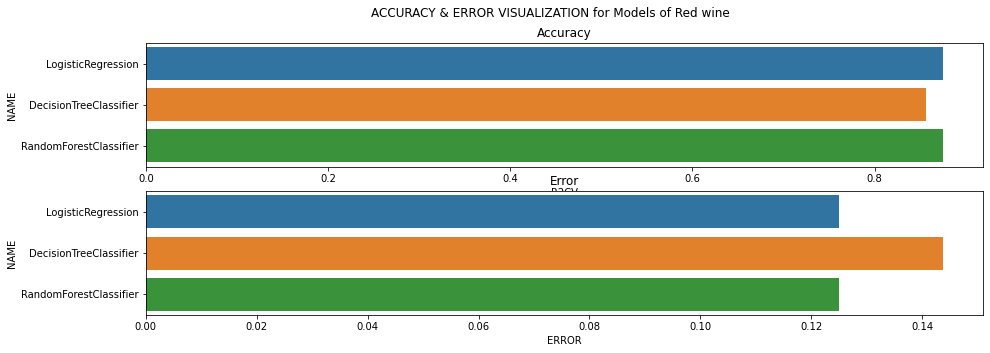

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5) )
fig.suptitle('ACCURACY & ERROR VISUALIZATION for Models of Red wine')

sns.barplot(ax=axes[0], y= "NAME", x= "R2CV", data = display_dfr)
axes[0].set_title('Accuracy')
  
sns.barplot(ax=axes[1], y= "NAME", x= "ERROR", data = display_dfr)
axes[1].set_title('Error')

### White wine

In [51]:
ww_cpy = ww.copy()

ww_cpy["quality"]= ww_cpy["quality"].apply(lambda x: qualityfunc(x))

print(ww_cpy['quality'].value_counts())

X_white = ww_cpy.loc[:, ww.columns != "quality"]
y_white = ww_cpy["quality"]

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state= 10)

0    3838
1    1060
Name: quality, dtype: int64


In [52]:
#Scaling the input
scaler = StandardScaler()
X_white_train = scaler.fit_transform(X_white_train) 
X_white_test = scaler.transform(X_white_test) 

#models used
lj_white = LogisticRegression(random_state= 10).fit(X_white_train, y_white_train)
cartc_white = DecisionTreeClassifier(random_state= 10).fit(X_white_train, y_white_train)
rfc_white = RandomForestClassifier(random_state= 10, verbose=False).fit(X_white_train, y_white_train)


modelsc_white = [lj_white ,cartc_white ,rfc_white ]


display_dfw = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_white:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_white_test, y_white_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model,  X_white_test, y_white_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfw = display_dfw.append(temp_df).reset_index(drop= True)
    print(f'--------------------{name}-------------------')
    cls = classification_report(y_white_test, model.predict(X_white_test))
    print(cls)
display_dfw.style.background_gradient('YlOrRd', axis=0)

--------------------LogisticRegression-------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       761
           1       0.60      0.28      0.38       219

    accuracy                           0.80       980
   macro avg       0.71      0.61      0.63       980
weighted avg       0.77      0.80      0.77       980

--------------------DecisionTreeClassifier-------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       761
           1       0.61      0.65      0.63       219

    accuracy                           0.83       980
   macro avg       0.75      0.77      0.76       980
weighted avg       0.83      0.83      0.83       980

--------------------RandomForestClassifier-------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       761
           1       0.85      0.58      0.69       219



,NAME,R2CV,ERROR
0,LogisticRegression,0.792857,0.207143
1,DecisionTreeClassifier,0.740816,0.259184
2,RandomForestClassifier,0.820408,0.179592


#### ACCURACY & ERROR VISUALIZATION

Text(0.5, 1.0, 'Error')

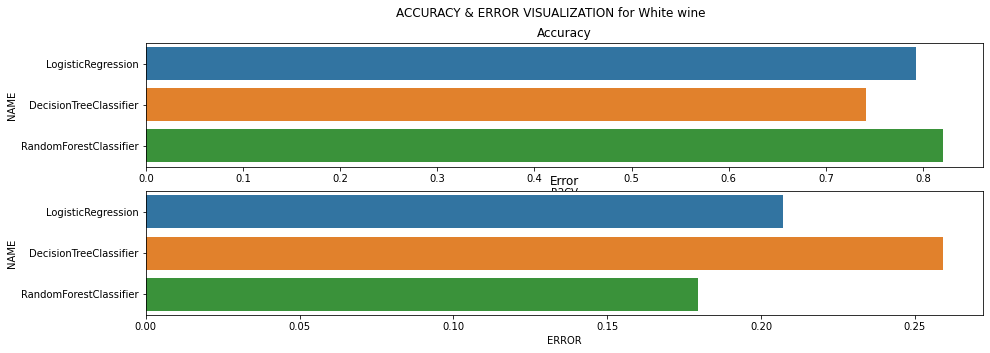

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5) )
fig.suptitle('ACCURACY & ERROR VISUALIZATION for White wine')

sns.barplot(ax=axes[0], y= "NAME", x= "R2CV", data = display_dfw)
axes[0].set_title('Accuracy')
  
sns.barplot(ax=axes[1], y= "NAME", x= "ERROR", data = display_dfw)
axes[1].set_title('Error')

<a id ='40' ></a>
<h2 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Smote(Over Sampling)</h2>
​
<p style = "color:darkgreen;font-family:Comic Sans MS;font-weight:bold" >We saw above that our data is an unbalanced data. We fix this with the help of smote.</p>

### Red wine

In [54]:
rw_cpy = rw.copy()
rw_cpy["quality"]= rw_cpy["quality"].apply(lambda x: qualityfunc(x))
print(rw_cpy['quality'].value_counts())

X_red = rw_cpy.loc[:, rw.columns != "quality"]
y_red = rw_cpy["quality"]

#Train-test-split
X_red_train,  X_red_test,  y_red_train,  y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state= 10)

0    1382
1     217
Name: quality, dtype: int64


In [55]:
#Using smote oversampling
sm = SMOTE(random_state=10)
X_rtrain_sm, y_rtrain_sm = sm.fit_resample(X_red_train, y_red_train)

print('For red wine:')
print("Before smote --> ", collections.Counter(y_red_train))
print("After smote --> ", collections.Counter(y_rtrain_sm))

#Scaling the input
scaler = StandardScaler()
X_rtrain_sm = scaler.fit_transform(X_rtrain_sm) 
X_red_test = scaler.transform(X_red_test) 

For red wine:
Before smote -->  Counter({0: 1112, 1: 167})
After smote -->  Counter({0: 1112, 1: 1112})


In [56]:
#models used
lj_red = LogisticRegression(random_state= 10).fit(X_rtrain_sm, y_rtrain_sm)
cartc_red = DecisionTreeClassifier(random_state= 10).fit(X_rtrain_sm, y_rtrain_sm)
rfc_red = RandomForestClassifier(random_state= 10, verbose=False).fit(X_rtrain_sm, y_rtrain_sm)

In [57]:
modelsc_red = [lj_red ,cartc_red ,rfc_red ]

In [58]:
display_dfr_smote = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_red:
    name = model.__class__.__name__ 
    R2CV = cross_val_score(model, X_red_test, y_red_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model, X_red_test, y_red_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfr_smote = display_dfr_smote.append(temp_df).reset_index(drop= True)
display_dfr_smote.style.background_gradient('YlOrRd', axis=0)


,NAME,R2CV,ERROR
0,LogisticRegression,0.865625,0.134375
1,DecisionTreeClassifier,0.856250,0.143750
2,RandomForestClassifier,0.878125,0.121875


### White wine

In [59]:
ww_cpy = ww.copy()

ww_cpy["quality"]= ww_cpy["quality"].apply(lambda x: qualityfunc(x))

print(ww_cpy['quality'].value_counts())

X_white = ww_cpy.loc[:, ww.columns != "quality"]
y_white = ww_cpy["quality"]

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state= 10)

0    3838
1    1060
Name: quality, dtype: int64


In [60]:
#Using smote oversampling
sm = SMOTE(random_state=10)
X_wtrain_sm, y_wtrain_sm = sm.fit_resample(X_white_train, y_white_train)

print('For white wine:')
print("Before smote --> ", collections.Counter(y_white_train))
print("After smote --> ", collections.Counter(y_wtrain_sm))


#Scaling the input
scaler = StandardScaler()
X_wtrain_sm = scaler.fit_transform(X_wtrain_sm) 
X_white_test = scaler.transform(X_white_test) 

For white wine:
Before smote -->  Counter({0: 3077, 1: 841})
After smote -->  Counter({0: 3077, 1: 3077})


In [61]:
#models used
lj_white = LogisticRegression(random_state= 10).fit(X_wtrain_sm, y_wtrain_sm)
cartc_white = DecisionTreeClassifier(random_state= 10).fit(X_wtrain_sm, y_wtrain_sm)
rfc_white = RandomForestClassifier(random_state= 10, verbose=False).fit(X_wtrain_sm, y_wtrain_sm)

In [62]:
modelsc_white = [lj_white ,cartc_white ,rfc_white ]

In [63]:
display_dfw_smote = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_white:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_white_test, y_white_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model,  X_white_test, y_white_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfw_smote = display_dfw_smote.append(temp_df).reset_index(drop= True)
display_dfw_smote.style.background_gradient('YlOrRd', axis=0)

,NAME,R2CV,ERROR
0,LogisticRegression,0.792857,0.207143
1,DecisionTreeClassifier,0.740816,0.259184
2,RandomForestClassifier,0.818367,0.181633


### Conclusion on Base Model and Smote(Oversampling)

In [64]:
print('For Red wine ------------- :')
display_dfr.merge(display_dfr_smote, left_on='NAME', right_on='NAME',
          suffixes=('_BEFORE_SMOTE', '_AFTER_SMOTE')).style.background_gradient('YlOrRd', axis=0)

For Red wine ------------- :


,NAME,R2CV_BEFORE_SMOTE,ERROR_BEFORE_SMOTE,R2CV_AFTER_SMOTE,ERROR_AFTER_SMOTE
0,LogisticRegression,0.875000,0.125000,0.865625,0.134375
1,DecisionTreeClassifier,0.856250,0.143750,0.856250,0.143750
2,RandomForestClassifier,0.875000,0.125000,0.878125,0.121875


In [65]:
print('For White wine ------------- :')
display_dfw.merge(display_dfw_smote, left_on='NAME', right_on='NAME',
          suffixes=('_BEFORE_SMOTE', '_AFTER_SMOTE')).style.background_gradient('YlOrRd', axis=0)

For White wine ------------- :


,NAME,R2CV_BEFORE_SMOTE,ERROR_BEFORE_SMOTE,R2CV_AFTER_SMOTE,ERROR_AFTER_SMOTE
0,LogisticRegression,0.792857,0.207143,0.792857,0.207143
1,DecisionTreeClassifier,0.740816,0.259184,0.740816,0.259184
2,RandomForestClassifier,0.820408,0.179592,0.818367,0.181633


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <h4><p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >We can't see any worthwile improvement in error and accuracy after using SMOTE(Oversampling) on both Red, White wine datasets. So we refrain from using SMOTE(Oversampling)</p> </h4></li>
</ul>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <h4><p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >The Base model for Red & White wine Datasets is Random Forest Classifier.</p> </h4></li>
</ul>

## Transformation of data & Removing outliers

In [66]:
rw_cpy = rw.copy()
ww_cpy = ww.copy()

In [67]:
# For positive data values
def boxcox_tranformation(input_feature):
    transformed_data, best_lambda = stats.boxcox(input_feature)
    return transformed_data

In [68]:
# For Negative data values
def yeojohn_tranformation(input_feature):
    transformed_data, best_lambda = stats.yeojohnson(input_feature)
    return transformed_data

In [69]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

### Redwine

In [70]:
for col in rw_cpy:
    print(col)
    skew = stats.skew(rw_cpy[col])
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')
    print('------------------------------------------')  

fixed acidity
A skew of 0.9818292953262073 means the distribution is moderately skewed
------------------------------------------
volatile acidity
A skew of 0.6709623963499574 means the distribution is moderately skewed
------------------------------------------
citric acid
A skew of 0.3180385895475358 means the distribution is approx. symmetric
------------------------------------------
residual sugar
A skew of 4.536394788805638 means the distribution is highly skewed
------------------------------------------
chlorides
A skew of 5.675016527504259 means the distribution is highly skewed
------------------------------------------
free sulfur dioxide
A skew of 1.249393847434253 means the distribution is highly skewed
------------------------------------------
total sulfur dioxide
A skew of 1.5141091878506638 means the distribution is highly skewed
------------------------------------------
density
A skew of 0.07122077153539946 means the distribution is approx. symmetric
----------------

<a id ='30' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Skewness Correction</h4>

<p style = "color:darkred;font-family:Comic Sans MS;font-weight:bold" >we will try to correct the skewness in some features of our data from the above graph.</p>

<ul>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > residual sugar </p> </li>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > chlorides </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >free sulfur dioxide </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >total sulfur dioxide </p> </li>
                    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >sulphates </p> </li>
    
            
</ul> 

In [71]:
trnsfrm_features = [ 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

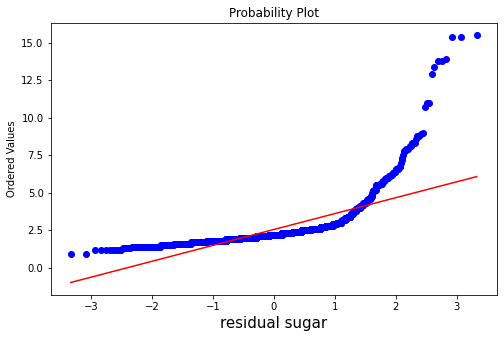

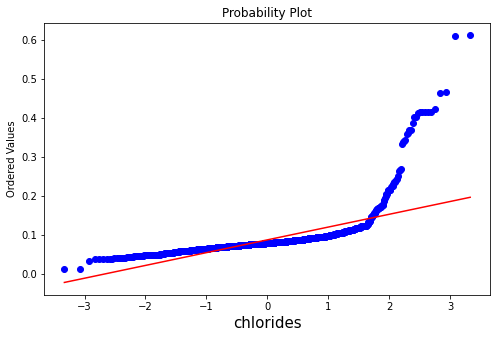

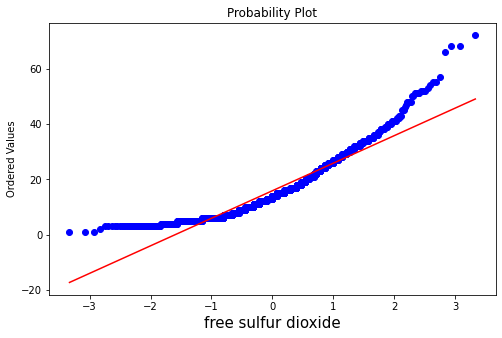

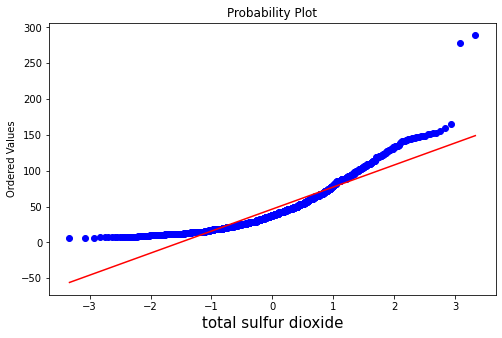

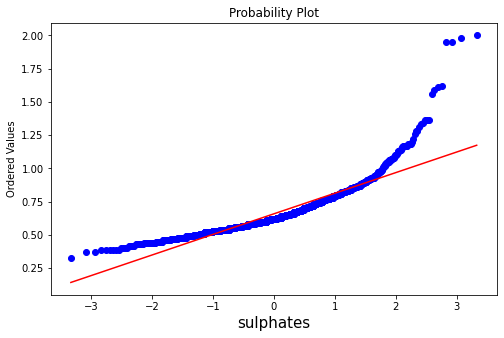

In [72]:
for col in trnsfrm_features:
        plt.figure(figsize = (8, 5))
        stats.probplot(rw_cpy[col], plot= plt )
        plt.xlabel(col, fontsize = 15)
        plt.show()

In [73]:
for col in trnsfrm_features:
    rw_cpy[col] = boxcox_tranformation(rw_cpy[col])


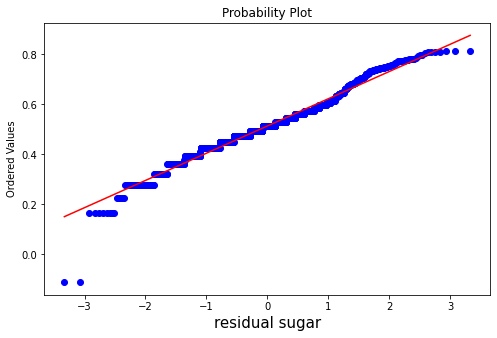

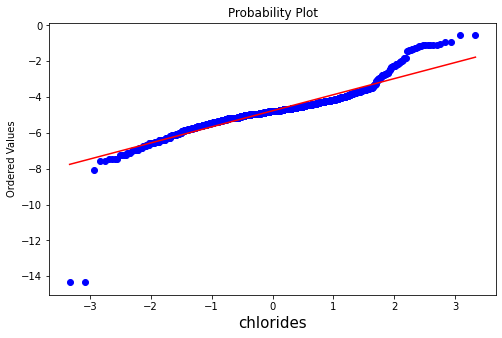

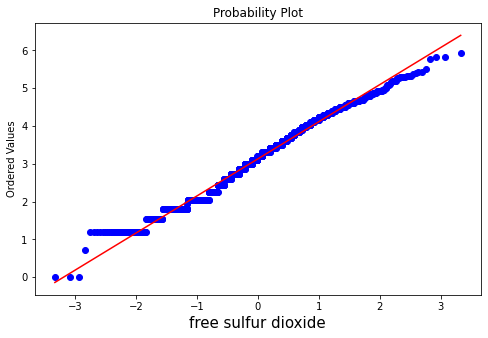

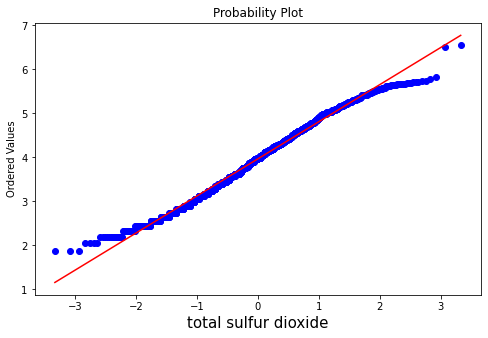

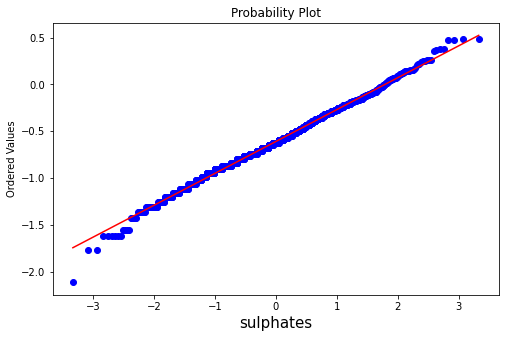

In [74]:
for col in trnsfrm_features:
        plt.figure(figsize = (8, 5))
        stats.probplot(rw_cpy[col], plot= plt )
        plt.xlabel(col, fontsize = 15)
        plt.show()

In [75]:
indices =  detect_outliers(rw_cpy, rw_cpy.columns)
print(len(indices))

64


In [76]:
rw_cpy.loc[indices, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,0.632555,-4.261884,3.504207,4.398416,1.00140,3.05,-0.236163,9.500000,6
353,13.5,0.530,0.79,0.714197,-3.580328,3.970312,4.859635,1.00180,3.18,-0.301243,13.000000,5
364,12.8,0.615,0.66,0.740823,-4.639653,2.248371,4.115556,1.00220,3.07,-0.373689,10.000000,7
366,12.8,0.615,0.66,0.740823,-4.639653,2.248371,4.115556,1.00220,3.07,-0.373689,10.000000,7
374,14.0,0.410,0.63,0.671964,-4.425149,2.046206,4.251908,1.00140,3.01,-0.236163,10.800000,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1475,5.3,0.470,0.11,0.513157,-6.583035,3.413163,5.040839,0.99182,3.54,-0.136918,13.566667,7
1477,5.3,0.470,0.11,0.513157,-6.583035,3.413163,5.040839,0.99182,3.54,-0.136918,13.600000,7
1488,5.6,0.540,0.04,0.394331,-6.500704,1.812859,2.739320,0.99420,3.72,-0.737642,11.400000,5
1491,5.6,0.540,0.04,0.394331,-6.500704,1.812859,2.739320,0.99420,3.72,-0.737642,11.400000,5


In [77]:
rw_cpy = rw_cpy.drop(indices, axis=0).reset_index(drop= True)

In [78]:
rw.shape

(1599, 12)

In [79]:
rw_cpy.shape

(1535, 12)

In [80]:
rw_cpy["quality"]= rw_cpy["quality"].apply(lambda x: qualityfunc(x))
print(rw_cpy['quality'].value_counts())

X_red = rw_cpy.loc[:, rw.columns != "quality"]
y_red = rw_cpy["quality"]

#Train-test-split
X_red_train,  X_red_test,  y_red_train,  y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state= 10)

0    1335
1     200
Name: quality, dtype: int64


In [81]:
#Scaling the input
scaler = StandardScaler()
X_red_train = scaler.fit_transform(X_red_train) 
X_red_test = scaler.transform(X_red_test) 

#models used
lj_red = LogisticRegression(random_state= 10).fit(X_red_train, y_red_train)
cartc_red = DecisionTreeClassifier(random_state= 10).fit(X_red_train, y_red_train)
rfc_red = RandomForestClassifier(random_state= 10, verbose=False).fit(X_red_train, y_red_train)

modelsc_red = [lj_red ,cartc_red ,rfc_red ]

display_dfr_outlr = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_red:
    name = model.__class__.__name__ 
    R2CV = cross_val_score(model, X_red_test, y_red_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model, X_red_test, y_red_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfr_outlr = display_dfr_outlr.append(temp_df).reset_index(drop= True)
    print(f'--------------------{name}-------------------')
    cls = classification_report(y_red_test, model.predict(X_red_test))
    print(cls)
display_dfr_outlr.style.background_gradient('YlOrRd', axis=0)

--------------------LogisticRegression-------------------
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       262
           1       0.72      0.29      0.41        45

    accuracy                           0.88       307
   macro avg       0.81      0.63      0.67       307
weighted avg       0.86      0.88      0.86       307

--------------------DecisionTreeClassifier-------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       262
           1       0.53      0.53      0.53        45

    accuracy                           0.86       307
   macro avg       0.73      0.73      0.73       307
weighted avg       0.86      0.86      0.86       307

--------------------RandomForestClassifier-------------------
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       262
           1       0.85      0.49      0.62        45



,NAME,R2CV,ERROR
0,LogisticRegression,0.860323,0.139677
1,DecisionTreeClassifier,0.827097,0.172903
2,RandomForestClassifier,0.879785,0.120215


Text(0.5, 1.0, 'Error')

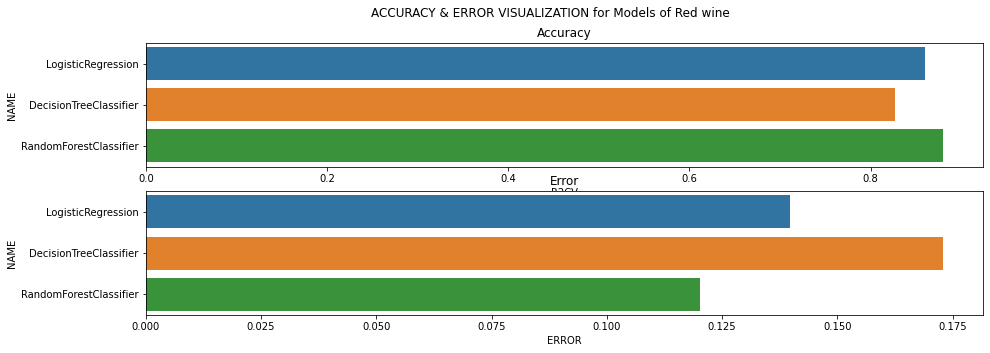

In [82]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5) )
fig.suptitle('ACCURACY & ERROR VISUALIZATION for Models of Red wine')

sns.barplot(ax=axes[0], y= "NAME", x= "R2CV", data = display_dfr_outlr )
axes[0].set_title('Accuracy')
  
sns.barplot(ax=axes[1], y= "NAME", x= "ERROR", data = display_dfr_outlr )
axes[1].set_title('Error')

###  White wine

In [83]:
for col in ww_cpy:
    print(col)
    skew = stats.skew(ww_cpy[col])
    if -0.5 < skew < 0.5:
        print (f'A skew of {skew} means the distribution is approx. symmetric')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print (f'A skew of {skew} means the distribution is moderately skewed')
    else:
        print (f'A skew of {skew} means the distribution is highly skewed')
    print('------------------------------------------')  

fixed acidity
A skew of 0.6475530855160632 means the distribution is moderately skewed
------------------------------------------
volatile acidity
A skew of 1.576496515957486 means the distribution is highly skewed
------------------------------------------
citric acid
A skew of 1.2815277799152376 means the distribution is highly skewed
------------------------------------------
residual sugar
A skew of 1.0767638711454448 means the distribution is highly skewed
------------------------------------------
chlorides
A skew of 5.0217921696710315 means the distribution is highly skewed
------------------------------------------
free sulfur dioxide
A skew of 1.4063140718346216 means the distribution is highly skewed
------------------------------------------
total sulfur dioxide
A skew of 0.39059017758152365 means the distribution is approx. symmetric
------------------------------------------
density
A skew of 0.9774735389049212 means the distribution is moderately skewed
------------------

<a id ='30' ></a>
<h4 style = "background:black;color:white;border:0;font-family:Comic Sans MS;font-weight:bold">Skewness Correction</h4>

<p style = "color:darkred;font-family:Comic Sans MS;font-weight:bold" >we will try to correct the skewness in some features of our data from the above graph.</p>

<ul>
    <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > volatile acidity </p> </li>
     <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > critric acid </p> </li>
        <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" > residual sugar </p> </li>
                   <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >chlorides </p> </li>
                <li style = "color:darkred"> <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" >free sulfur dioxide </p> </li>
            
</ul> 

In [84]:
trnsfrm_features = ['volatile acidity','citric acid', 'residual sugar','chlorides', 'free sulfur dioxide']

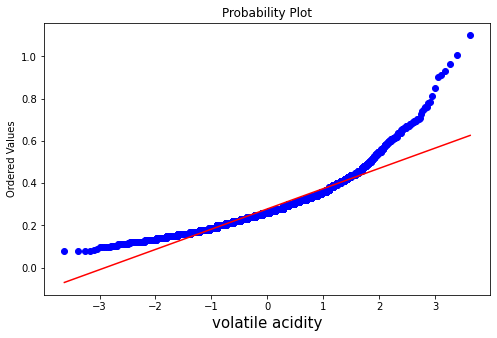

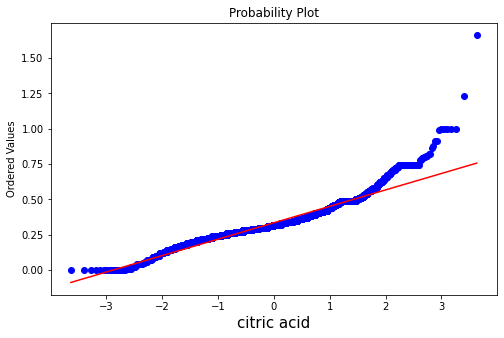

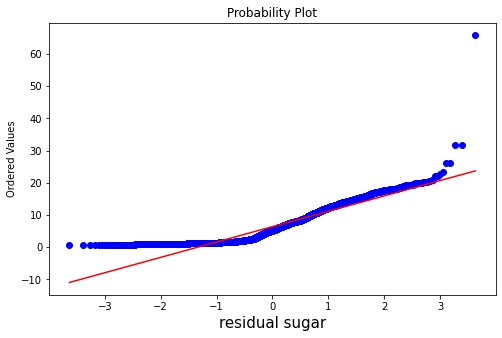

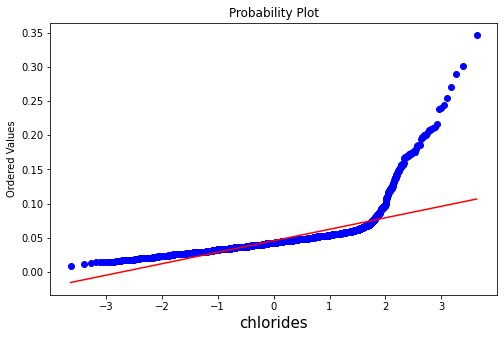

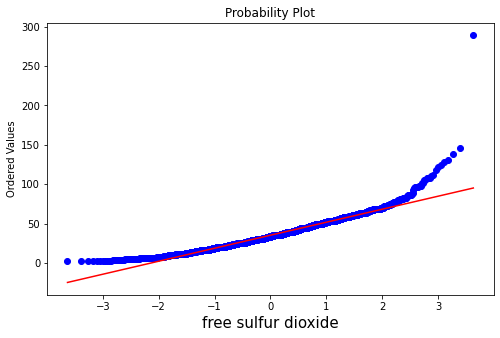

In [85]:
for col in trnsfrm_features:
        plt.figure(figsize = (8, 5))
        stats.probplot(ww_cpy[col], plot= plt )
        plt.xlabel(col, fontsize = 15)
        plt.show()

In [86]:
for col in trnsfrm_features:
    ww_cpy[col] = yeojohn_tranformation(ww_cpy[col])


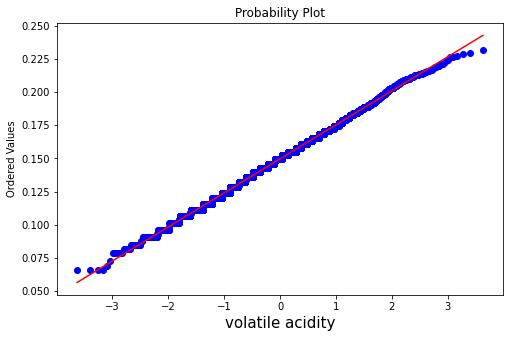

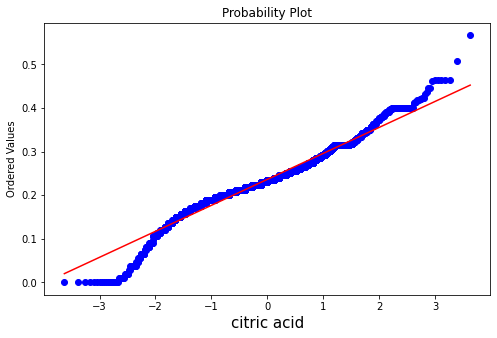

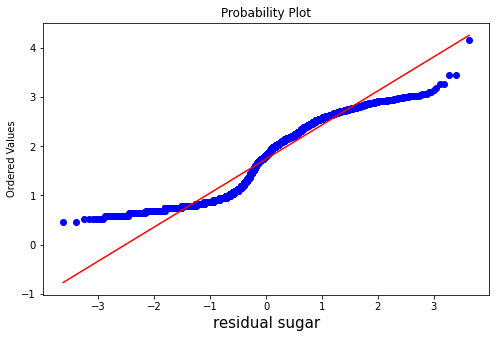

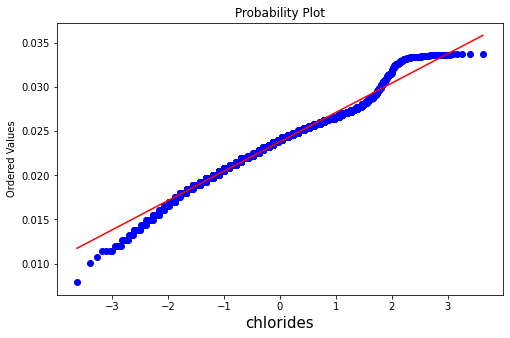

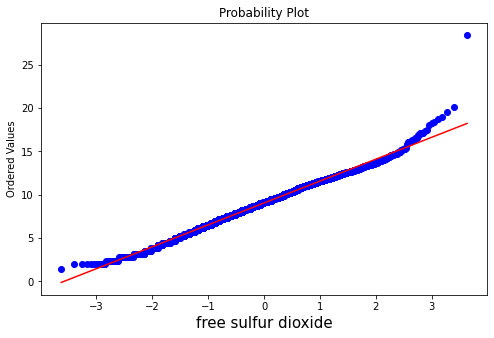

In [87]:
for col in trnsfrm_features:
        plt.figure(figsize = (8, 5))
        stats.probplot(ww_cpy[col], plot= plt )
        plt.xlabel(col, fontsize = 15)
        plt.show()

In [88]:
indices =  detect_outliers(ww_cpy, ww_cpy.columns)
print(len(indices))

117


In [89]:
ww_cpy.loc[indices, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
207,10.2,0.189110,0.437814,1.965856,0.025562,6.767324,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.207342,0.265544,0.953582,0.028658,9.179606,182.0,0.99680,3.23,0.38,8.5,3
774,9.1,0.152302,0.297736,2.438335,0.021566,8.223616,124.0,0.99700,3.20,0.46,10.4,9
873,10.3,0.115741,0.306305,0.873849,0.022242,2.810348,33.0,0.99390,2.89,0.28,9.6,3
1214,9.7,0.142884,0.297736,0.787143,0.020848,4.711052,59.0,0.99260,2.74,0.47,10.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2930,5.6,0.132227,0.275110,0.831443,0.023481,14.739313,147.0,0.99010,3.22,0.95,11.6,8
2931,5.2,0.108783,0.240215,0.953582,0.018855,5.224656,59.0,0.98975,3.30,0.84,11.9,8
3754,5.4,0.192113,0.128323,1.128697,0.017971,8.389780,130.0,0.98953,3.39,0.77,13.4,8
3764,5.4,0.192113,0.128323,1.128697,0.017971,8.389780,130.0,0.98953,3.39,0.77,13.4,8


In [90]:
ww_cpy = ww_cpy.drop(indices, axis=0).reset_index(drop= True)

In [91]:
ww.shape

(4898, 12)

In [92]:
ww_cpy.shape

(4781, 12)

In [93]:
ww_cpy["quality"]= ww_cpy["quality"].apply(lambda x: qualityfunc(x))

print(ww_cpy['quality'].value_counts())

X_white = ww_cpy.loc[:, ww.columns != "quality"]
y_white = ww_cpy["quality"]

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state= 10)

0    3758
1    1023
Name: quality, dtype: int64


In [94]:
#Scaling the input
scaler = StandardScaler()
X_white_train = scaler.fit_transform(X_white_train) 
X_white_test = scaler.transform(X_white_test) 

#models used
lj_white = LogisticRegression(random_state= 10).fit(X_white_train, y_white_train)
cartc_white = DecisionTreeClassifier(random_state= 10).fit(X_white_train, y_white_train)
rfc_white = RandomForestClassifier(random_state= 10, verbose=False).fit(X_white_train, y_white_train)


modelsc_white = [lj_white ,cartc_white ,rfc_white ]


display_dfw_outlr = pd.DataFrame(columns= ['NAME',  'R2CV', 'ERROR']) 
for model in modelsc_white:
    name = model.__class__.__name__
    R2CV = cross_val_score(model, X_white_test, y_white_test, cv=10, verbose=False).mean()
    error = -cross_val_score(model,  X_white_test, y_white_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
    temp_df = pd.DataFrame([[name,  R2CV, error]], columns= ['NAME',  'R2CV', 'ERROR'])
    display_dfw_outlr = display_dfw_outlr.append(temp_df).reset_index(drop= True)
    print(f'--------------------{name}-------------------')
    cls = classification_report(y_white_test, model.predict(X_white_test))
    print(cls)
display_dfw_outlr.style.background_gradient('YlOrRd', axis=0)

--------------------LogisticRegression-------------------
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       744
           1       0.59      0.24      0.34       213

    accuracy                           0.79       957
   macro avg       0.70      0.60      0.61       957
weighted avg       0.76      0.79      0.76       957

--------------------DecisionTreeClassifier-------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       744
           1       0.61      0.64      0.63       213

    accuracy                           0.83       957
   macro avg       0.76      0.76      0.76       957
weighted avg       0.83      0.83      0.83       957

--------------------RandomForestClassifier-------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       744
           1       0.86      0.58      0.69       213



,NAME,R2CV,ERROR
0,LogisticRegression,0.793037,0.206963
1,DecisionTreeClassifier,0.748147,0.251853
2,RandomForestClassifier,0.831645,0.168355


Text(0.5, 1.0, 'Error')

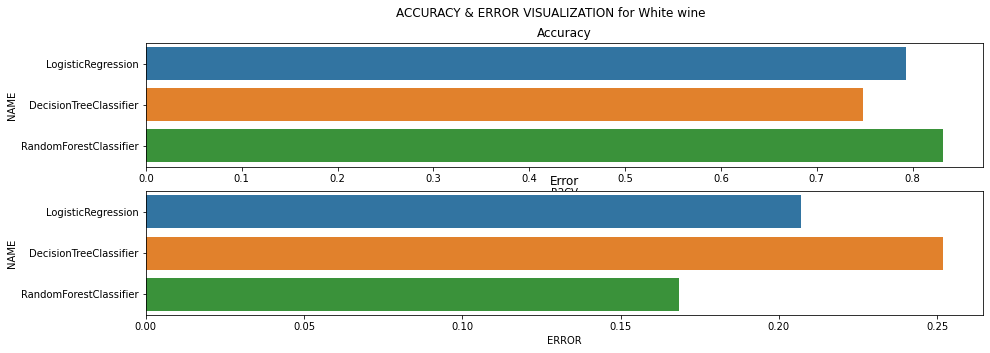

In [95]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5) )
fig.suptitle('ACCURACY & ERROR VISUALIZATION for White wine')

sns.barplot(ax=axes[0], y= "NAME", x= "R2CV", data = display_dfw_outlr)
axes[0].set_title('Accuracy')
  
sns.barplot(ax=axes[1], y= "NAME", x= "ERROR", data = display_dfw_outlr)
axes[1].set_title('Error')

### Conclusion on Outliers

In [96]:
print('For Red wine ------------- :')
display_dfr.merge(display_dfr_outlr, left_on='NAME', right_on='NAME',
          suffixes=('_bfr_TREATING', '_afr_TREATING')).style.background_gradient('YlOrRd', axis=0)

For Red wine ------------- :


,NAME,R2CV_bfr_TREATING,ERROR_bfr_TREATING,R2CV_afr_TREATING,ERROR_afr_TREATING
0,LogisticRegression,0.875000,0.125000,0.860323,0.139677
1,DecisionTreeClassifier,0.856250,0.143750,0.827097,0.172903
2,RandomForestClassifier,0.875000,0.125000,0.879785,0.120215


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" ><h4>Random Forest is the Base model for Red wine dataset.</h4></p> </li>
</ul>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" ><h4>For the Redwine Dataset we had removed 64 Outliers(4% of data) to increase in accuracy of 0.4% which is not worth for the amount of data we removed.</p> </h4></li>
</ul>

In [97]:
print('For White wine ------------- :')
display_dfw.merge(display_dfw_outlr, left_on='NAME', right_on='NAME',
          suffixes=('_bfr_TREATING', '_afr_TREATING')).style.background_gradient('YlOrRd', axis=0)

For White wine ------------- :


,NAME,R2CV_bfr_TREATING,ERROR_bfr_TREATING,R2CV_afr_TREATING,ERROR_afr_TREATING
0,LogisticRegression,0.792857,0.207143,0.793037,0.206963
1,DecisionTreeClassifier,0.740816,0.259184,0.748147,0.251853
2,RandomForestClassifier,0.820408,0.179592,0.831645,0.168355


<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" ><h4>Random Forest is the Base model for White wine dataset.</h4></p> </li>
</ul>

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" ><h4>For the White wine Dataset we had removed 117 Outliers(2% of data) to increase in accuracy of 1.1% which is absolutely fine for the data removed.</h4></p> </li>
</ul>

## Tuning of the Random Forests (Base Model) to increase Accuracy

### Red wine

In [98]:
rw_cpy = rw.copy()
rw_cpy["quality"]= rw_cpy["quality"].apply(lambda x: qualityfunc(x))
print(rw_cpy['quality'].value_counts())

X_red = rw_cpy.loc[:, rw.columns != "quality"]
y_red = rw_cpy["quality"]

#Train-test-split
X_red_train,  X_red_test,  y_red_train,  y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state= 10)

#Scaling the input
scaler = StandardScaler()
X_red_train = scaler.fit_transform(X_red_train) 
X_red_test = scaler.transform(X_red_test)

0    1382
1     217
Name: quality, dtype: int64


In [99]:
params = params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8, 10],
          "n_estimators": [10, 100, 250, 500, 750, 1000],
          "min_samples_split": [2, 5, 10]}

rfc1 = RandomForestClassifier(random_state = 10)

In [100]:
cv1 = GridSearchCV(rfc1,params,cv= 10,verbose=False,n_jobs=-1, scoring = 'f1_weighted').fit(X_red_train, y_red_train)
print(cv1.best_params_)
rfc1 = RandomForestClassifier(max_depth = cv1.best_params_['max_depth'], max_features = cv1.best_params_['max_features'],min_samples_split = cv1.best_params_['min_samples_split'], 
                              n_estimators = cv1.best_params_['n_estimators'], random_state= 10).fit(X_rtrain_sm,y_rtrain_sm)


{'max_depth': 10, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 250}


In [101]:
rfc_cv1 = cross_val_score( rfc1 , X_red_test, y_red_test, cv=10, verbose=False).mean()
print(rfc_cv1)

0.890625


In [102]:
error = -cross_val_score(rfc1,  X_red_test, y_red_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
print(error)

0.109375


### White wine

In [103]:
params = {"max_depth": [2, 5, 8, 10],
          "max_features": [2, 5, 8, 10],
          "n_estimators": [10, 100, 250, 500, 750, 1000],
          "min_samples_split": [2, 5, 10]}

rfc2 = RandomForestClassifier(random_state= 10)

In [104]:
cv2 = GridSearchCV(rfc2,params,cv=10,verbose=False,n_jobs=-1, scoring = 'f1_weighted').fit(X_white_train, y_white_train)
print(cv2.best_params_)
rfc2 = RandomForestClassifier(max_depth = cv2.best_params_['max_depth'], 
                               max_features = cv2.best_params_['max_features'], min_samples_split = cv2.best_params_['min_samples_split'], 
                               n_estimators = cv2.best_params_['n_estimators'], random_state= 10).fit(X_wtrain_sm, y_wtrain_sm)


{'max_depth': 10, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 750}


In [105]:
rfc_cv2 = cross_val_score( rfc2 ,X_white_test, y_white_test, cv=10, verbose=False).mean()
print(rfc_cv2)

0.8400438596491228


In [106]:
error = -cross_val_score(rfc2,  X_white_test, y_white_test, cv=10, scoring="neg_mean_squared_error", verbose=False).mean()
print(error)

0.15995614035087719


# Multi-class classification

We are going to assign it this way:
1. 0-4  : Bad Quality  --- 0
2. 4-7  : Average Quality --- 1
3. 7-10 : Good Quality --- 2

In [107]:
def qualityfunc(x):
    if x>7:
        return 2
    if x<7 and x>4:
        return 1
    else:
        return 0


##### Red wine

In [108]:
rw_cpy = rw.copy()
rw_cpy["quality"]= rw_cpy["quality"].apply(lambda x: qualityfunc(x))
print(rw_cpy['quality'].value_counts())

X_red = rw_cpy.loc[:, rw.columns != "quality"]
y_red = rw_cpy["quality"]

#Train-test-split
X_red_train,  X_red_test,  y_red_train,  y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state= 10)

1    1319
0     262
2      18
Name: quality, dtype: int64


In [109]:
#Scaling the input
scaler = StandardScaler()
X_red_train = scaler.fit_transform(X_red_train) 
X_red_test = scaler.transform(X_red_test)

rfc = RandomForestClassifier(random_state= 10, verbose=False).fit(X_red_train, y_red_train)
cvs=cross_validate(rfc ,X_red_test ,y_red_test,cv= 10,scoring=['f1_weighted','recall_weighted','precision_weighted'])
print(pd.DataFrame([[cvs['test_f1_weighted'].mean(),  cvs['test_recall_weighted'].mean(), cvs['test_precision_weighted'].mean()]],
             columns = ['f1_weighted','recall_weighted','precision_weighted'], index = ['Random Forest Classifier']) )
score = cross_val_score(rfc,X_red_test, y_red_test, cv = 10, verbose = False).mean()
print(score)

                          f1_weighted  recall_weighted  precision_weighted
Random Forest Classifier     0.784485         0.815625            0.776255
0.815625


##### White wine

In [110]:
ww_cpy = ww.copy()

ww_cpy["quality"]= ww_cpy["quality"].apply(lambda x: qualityfunc(x))

print(ww_cpy['quality'].value_counts())

X_white = ww_cpy.loc[:, ww.columns != "quality"]
y_white = ww_cpy["quality"]

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state= 10)

1    3655
0    1063
2     180
Name: quality, dtype: int64


In [111]:
#Scaling the input
scaler = StandardScaler()
X_white_train = scaler.fit_transform(X_white_train) 
X_white_test = scaler.transform(X_white_test) 


rfc = RandomForestClassifier(random_state= 10, verbose=False).fit(X_white_train, y_white_train)
cvs=cross_validate(rfc ,X_white_test, y_white_test,cv= 10,scoring=['f1_weighted','recall_weighted','precision_weighted'])
print(pd.DataFrame([[cvs['test_f1_weighted'].mean(),  cvs['test_recall_weighted'].mean(), cvs['test_precision_weighted'].mean()]],
             columns = ['f1_weighted','recall_weighted','precision_weighted'], index = ['Random Forest Classifier']) )
score = cross_val_score(rfc, X_white_test,  y_white_test, cv = 10, verbose = False).mean()
print(score)

                          f1_weighted  recall_weighted  precision_weighted
Random Forest Classifier     0.732972         0.771429            0.728344
0.7714285714285715


### Conclusion on Multi-class

<ul>
    <li style = "color:darkred;font-family:Segoe Print;font-weight:bold" > <p style = "color:black;font-family:Comic Sans MS;font-weight:bold" ><h4>The f1-Weighted scores of multi-class are really not up-to-mark when in compared to Binary Classification. So we do not choose Multi-class Classification.</p> </h4></li>
</ul>

# Conclusion


<font color='green'> **Binary Classification problem with tuned Random forests**</font> being the best model having **accuracy of 0.8797 (red wine), 0.8316 (white wine)** with **least errors 0.1202 (red wine), 0.1683 (white wine)**. <font color='red'>Regression</font> on the other hand along with feature engineering did <font color='red'>not</font> prove to be a very <font color='red'>suitable</font> model. The scores of all the models we tried in Regression are as follows:


<h3><center>Red Wine</center></h3>

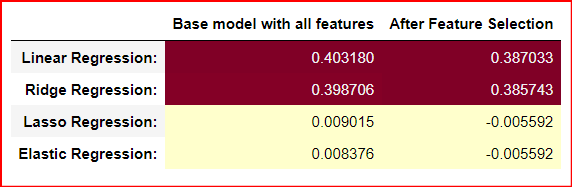

<h3><center>White Wine</center></h3>

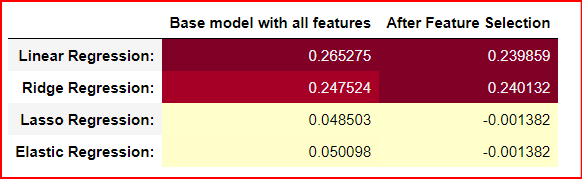